# UCL AI Society Machine Learning Tutorials
### Session 02. Introduction to Machine Learning

### Contents
1. Train/test set split
2. Various Cross Validation teqniques
3. Regressions
4. Classifications
5. All in one challenge: Boston house

### Aim
At the end of this session, you will be able to:
- Understand how to prepare your dataset.
- Use the most popular library in Machine Learning
- Implement simple regression and classification models.
- Practice a whole machine learning project individually.

### Outline
1. train/test set spliting
    
    1.1 by sklearn
    
    1.2 mannul practice


2. Cross validation techniques

    2.1  KFold with and without shuffle
    
    2.2  Stratified KFold
    
    2.3  Group KFold

## 0. Introduction to Sklean
Scikit-learn is one of the most popular machine learning libraries. It provides us a set of methods and functions for every stages in machine learning model implementation with brief codes, e.g. example datasets, feature engineering, data split, ML models, etc. A summation is given below:

1. **Example Datasets**  
    sklearn.datasets : Provides example datasets  

2. **Feature Engineering**  
    sklearn.preprocessing : Variable functions as to data preprocessing  
    sklearn.feature_selection : Help selecting primary components in datasets  
    sklearn.feature_extraction : Vectorised feature extraction  
    sklearn.decomposition : Algorithms regarding Dimensionality Reduction  

3. **Data split and Parameter Tuning**  
    sklearn.model_selection : 'Train Test Split' for cross validation, Parameter tuning with GridSearch  

4. **Evaluation**  
    sklearn.metrics : accuracy score, ROC curve, F1 score, etc.  

5. **ML Algorithms**  
    sklearn.ensemble : Ensemble, etc.  
    sklearn.linear_model : Linear Regression, Logistic Regression, etc.  
    sklearn.naive_bayes : Gaussian Naive Bayes classification, etc.  
    sklearn.neighbors : Nearest Centroid classification, etc.  
    sklearn.svm : Support Vector Machine  
    sklearn.tree : DecisionTreeClassifier, etc.  
    sklearn.cluster : Clustering (Unsupervised Learning)  
    
6. **Utilities**  
    sklearn.pipeline: pipeline of (feature engineering -> ML Algorithms -> Prediction)  
    
7. **Train and Predict**  
    fit()  
    predict()  

## 1. Train/Test Set Spliting
To fairly evaluate a machine learning model, the data used in training and testing phase should be split, where they never intersect with each other. This is because a fair evaluation in machine learning means the generalization is assessed, which means the trained model should be blind to the test data. Otherwise, it introduces the bias error to the model. For example, if students have seen and tried the exam paper in advance, can the exam results fairly reflect how well students understand the knowledge?
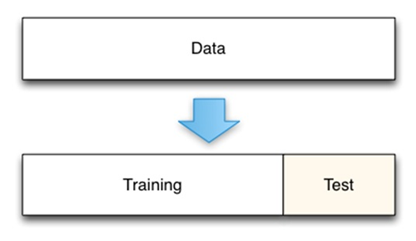

Firstly, let's load a famous dataset `iris` embedded in sklearn and have an overview.

In [ ]:
# Import pandas, numpy and example dataset
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [ ]:
# Load iris dataset
iris = load_iris()

# Get features and label
data = iris.data
feature_name = iris.feature_names
feature_name=[i.split(' ')[1] for i in feature_name]
label = iris.target

# TODO: form the data features into a dataframe with column names by using pandas
dataset_df = pd.DataFrame(None, columns=None)

# TODO: use describe() to view the feature's statistics
print(dataset_df.None())
print("********************************************************")

# TODO: Add a column of label to the dataframe, and then print 10 observations randomly
dataset_df['None']=None
sample=dataset_df.sample(n=10, random_state=1)
print(sample)

### 1.1 Dataset spliting by Sklearn
In this case, we will use `sklearn.model_selection.train_test_split()` to split the example dataset `iris`.

`train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)`

- \*arrays : x and y data  
- test_size : Ratio of Test data (default = 0.25)  
- train_size : Ratio of Train data (default = 1 - 0.25)  
- random_state : seed value for shuffle. It is used to seed a new RandomState object. This is to check and validate the data when running the code multiple times  
- shuffle : shuffle or not? (default = True)  
- stratify : will discuss later on (default = None)  

Typically, $\left| {{S_{train}}} \right|:\left| {{S_{test}}} \right|$ ranges from 5:5 to 8:2, where training set is used to train the model, test set to check its performance. Practically, a validation set is split from training set only for model selection and hyperparameter tuning. We will see it later.

In [ ]:
# Import train_test_split from sklearn library
from sklearn.model_selection import train_test_split

# Before spliting, add a column of index to the data, which helps to visualize the result
index=np.array([i for i in range(data.shape[0])])
data_withIndex=np.hstack((index.reshape(-1,1),data))

# Split the data into X_train, X_test, Y_train and Y_test
X_train, X_test, Y_train, Y_test = train_test_split(data_withIndex, label, 
                                                    test_size=0.3, random_state=18, shuffle=True)

# TODO: check the number of observations in train set, test set and then verify the ratio
print("Length of X_train: {}".format(None))
print("Length of X_test: {}".format(None))
print("train_test ratio: {0:.2f}%".format(None))

Then, we can visualize the spliting result.

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

cmap_data = plt.cm.coolwarm 
cmap_class = plt.cm.Paired

# Visualization
def split_visualize(label,train_or_test): 
    fig,ax = plt.subplots()
    ax.scatter(range(index.shape[0]),[0.5]*index.shape[0],
               c=label,marker='_',lw=50,cmap=cmap_class)
    ax.scatter(range(index.shape[0]),[3.5]*index.shape[0],
               c=train_or_test,marker='_',lw=50, cmap=cmap_data, vmin=-.2, vmax=1.2)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5], xticks=np.arange(0,len(label)+1,15),xlim=[0,len(label)],
           yticklabels=['Iris\nClass', 'Train/Test\n set'], xlabel="Observation index")
    ax.legend([Patch(color=cmap_data(.8)), Patch(color=cmap_data(.02))],
              ['Trainning set', 'Test set'], loc=(1.01, .8))

In [ ]:
# Mark the observations split into training set as 1, test set as 0
# Recall that the first column for X_train and X_test is the index column
train_or_test=np.array([np.nan] * data_withIndex.shape[0])
train_or_test[X_train[:,0].astype(int)]=1
train_or_test[X_test[:,0].astype(int)]=0  

split_visualize(label,train_or_test)

### 1.2 Mannul dataset spliting
Now, we are going to implement our own dataset spliting function

*hint: you may want to use `random.sample(total_population,sample_size)` to generate ramdom indeices for training/test set*

In [ ]:
import random

# TODO: develop your own dataset spliting function
def my_dataset_spliting(test_size, X, Y):
    None
    return X_train, X_test, Y_train, Y_test

# Test your function
X_train, X_test, Y_train, Y_test = my_dataset_spliting(test_size=None, X=data_withIndex, Y=label)

# TODO: check the number of observations in train set, test set and then verify the ratio
print("Length of X_train: {}".format(None))
print("Length of X_test: {}".format(None))
print("train_test ratio: {0:.2f}%".format(None))

Again, visualize it and compare with the previous result.

In [ ]:
# Mark the observations split into training set as 1, test set as 0
train_or_test=np.array([np.nan] * data_withIndex.shape[0])
train_or_test[X_train[:,0].astype(int)]=1
train_or_test[X_test[:,0].astype(int)]=0  

# Visualization
split_visualize(label,train_or_test)

## 2. Cross Validation



The validation set is used to evaluate a given model. We as machine learning engineers use this data to fine-tune the model hyperparameters. Hence the model occasionally sees this data, but never does it “Learn” from this. Most ML engineers use the validation set results to update hyperparameters. So the validation in a way affects a model, but indirectly.
*(Ref. [medium blog](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7))*

However, relatively insufficient data always has serious impact on model performance. So we use cross validation(CV) to improve the utility of data. For example, K-Fold CV is one of the most commonly used CV techniques. It splits the whole training set into K subsets which have no intersection with each other, and then use one of the K subsets as validation set, others as training set. Each subset will be used once, which means K rounds training and validating. The model should be evaluated by integrating the K results from every rounds.

Typically:
- Cross Validation is encouraged to use when dataset is not big enough.  
- Cross Validation is used to avoid overfitting. 
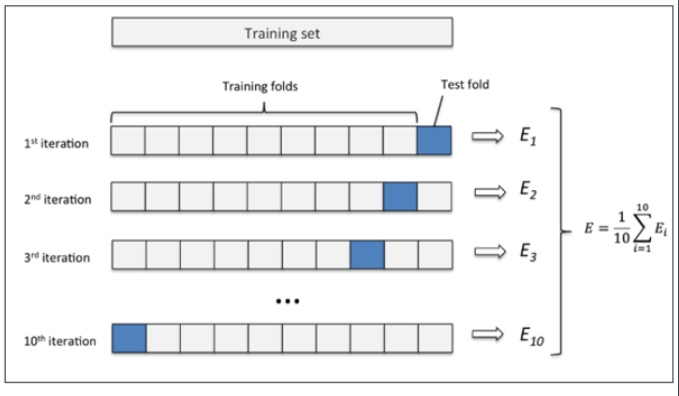

In this section, besides KFold CV, we are going to see more CV techniques such as Shuffle Split, Stratified KFold, Stratified Shuffle Split.

You may want to check more instructions and examples [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

In [ ]:
# Import CVs from sklearn
from sklearn.model_selection import (KFold, ShuffleSplit,
                                     StratifiedKFold, StratifiedShuffleSplit)
cv_techniques = [KFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit]

However, the `iris` dataset is a balanced dataset with equal number of observations for each class. So stratified sampling should be equivalent to random sampling.

So, a subset of `iris` will be made for demonstrating purpose.

In [ ]:
# Define the wanted number of observations for each class
class0=50
class1=30
class2=10

# Form the subset of iris dataset
subset=np.vstack((np.vstack((data[:class0,:],data[50:50+class1,:])),data[100:100+class2,:]))
sub_label= np.hstack((np.hstack((label[:class0],label[50:50+class1])),label[100:100+class2]))

# Verify the result
from collections import Counter
stat = Counter(sub_label)
print(stat)

In [ ]:
# TODO: Define the number of CV rounds
n_splits = None

In [1]:
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 0
        indices[tr] = 1

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_data,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_class)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class']
    ax.set(xticks=np.arange(0,X.shape[0]+1,10),
           yticks=np.arange(n_splits + 1) + .5, 
           yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits + 1.2, -.2], xlim=[0, X.shape[0]])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

In [2]:
# plot
for cv in cv_techniques:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(this_cv, subset, sub_label, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Training set', 'Test set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)

NameError: name 'cv_techniques' is not defined

TODO: Based on the graphs above, what will happen if we apply KFold CV without shuffle?

*hint: In the 4th round of KFold CV, have the model learned from any observation in class 2?*

In [ ]:
# TODO: Develop your own KFold function, returning K sets of indices for training and testing sets.
def my_KFold(k, X, Y):
    None
    return trainset_indices, testset_indices

# TODO: Then test your KFold function
k=None
train_indices,test_indices=my_KFold(k,data,label)

# Similar to the previous plots
fig, ax = plt.subplots(figsize=(6, 3))
for i in range(k):
    train_or_test = np.array([np.nan] * len(data))
    train_or_test[train_indices[i]] = 1
    train_or_test[test_indices[i]] = 0
    # Visualize the results
    ax.scatter(range(len(train_or_test)), [i + .5] * len(train_or_test),
               c=train_or_test, marker='_', lw=10, cmap=cmap_data,
               vmin=-.2, vmax=1.2)  

ax.scatter(range(len(data)), [k+0.5] * len(data),
           c=label, marker='_', lw=10, cmap=cmap_class)

yticklabels = list(range(k)) + ['class']
ax.set(xticks=np.arange(0,data.shape[0]+1,10),
       yticks=np.arange(k + 1) + .5, 
       yticklabels=yticklabels,
       xlabel='Sample index', ylabel="CV iteration",
       ylim=[k + 1.2, -.2], xlim=[0, data.shape[0]])
ax.set_title(('KFold built on my own'), fontsize=15)

ax.legend([Patch(color=cmap_data(.8)), Patch(color=cmap_data(.02))],
          ['Training set','Test set',], loc=(1.02, .8))